# Visualize và so sánh kết quả của các thí nghiệm

In [1]:
import numpy as np 
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from os.path import join as osjoin
import pickle
import matplotlib.pyplot as plt
import torch

In [2]:
loss_saved_path = "/Users/awlvn/hungvm/MoD/MoD_advance_ml/NGCF-PyTorch/Result"

In [3]:
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [4]:
def read_and_convert_to_cpu(file_path):
    with open(file_path, "rb") as input_file:
        loss_values = CPU_Unpickler(input_file).load()
    return [element.detach().numpy() for element in loss_values]

In [5]:
def draw_loss_curves(objects, names):
    plt.rcParams.update({'font.size': 14})
    plt.figure(figsize=(8,6))
    for obj in objects:
        plt.plot(obj)
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title(f"Loss Curves Comparison")
    plt.legend(names)
    plt.show()

In [84]:
def draw_comparison(values, names, metric, label_off, figsize = (8, 5), ylim=None):
    fig = plt.figure(figsize = figsize)
    plt.rcParams.update({'font.size': 12})
    plt.bar(names, values, width = 0.4, color="orange")
    plt.margins(x=0.3)
    plt.xlabel("Method")
    plt.ylabel(f"{metric}")
    if ylim:
        plt.ylim(ylim)
    for index, data in enumerate(values):
        plt.text(x=index , y =data+label_off , s=f"{round(data,4)}" , fontdict=dict(fontsize=12))
    plt.title(f"{metric} Comparison", pad=20)
    plt.show()

In [7]:
default_path = osjoin(loss_saved_path, "gowalla_loss.pkl")
lr0001_path = osjoin(loss_saved_path, "lr0.001_gowalla_loss.pkl")
noskipconnection_path = osjoin(loss_saved_path, "no-skip-connection_gowalla_loss.pkl")
gelu_path = osjoin(loss_saved_path, "gelu_gowalla_loss.pkl")
nobi_path = osjoin(loss_saved_path, "no-bi_gowalla_loss.pkl")

In [74]:
names0 = ["Source", "Default"]
names1 = ["Default", "LR=0.001", "Gelu", "No SC"]
names2 = ["Default", "No Skip Connection"]
names3 = ["Default", "No Self-Connection"]
names4 = ["Default", "LR=0.001"]
names5 = ["Default", "GELU"]

## Loss

In [9]:
default_loss = read_and_convert_to_cpu(default_path)
lr0001_loss = read_and_convert_to_cpu(lr0001_path)
skip_e_loss = read_and_convert_to_cpu(noskipconnection_path)
gelu_loss = read_and_convert_to_cpu(gelu_path)
nobi_loss = read_and_convert_to_cpu(nobi_path)

In [10]:
min_loss_default = float(min(default_loss))
min_loss_lr0001 = float(min(lr0001_loss))
min_loss_skip_e = float(min(skip_e_loss))
min_loss_gelu = float(min(gelu_loss))
min_loss_nobi = float(min(nobi_loss))

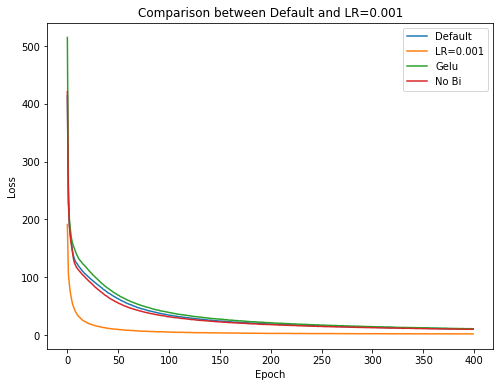

In [11]:
draw_loss_curves([default_loss, lr0001_loss, gelu_loss, nobi_loss], names1)

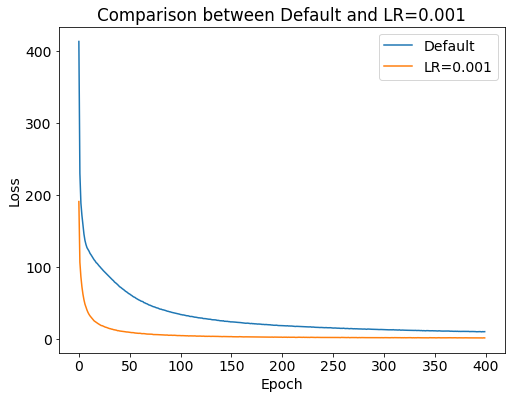

In [39]:
draw_loss_curves([default_loss, lr0001_loss], names4)

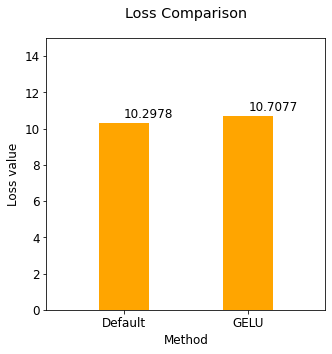

In [58]:
draw_comparison([min_loss_default, min_loss_gelu], names5, metric="Loss", figsize=(5,5),label_off=0.3, ylim=[0, 15])

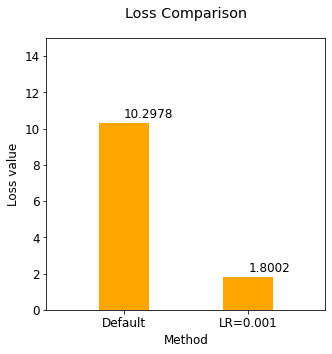

In [49]:
draw_comparison([min_loss_default, min_loss_lr0001], names5, metric="Loss", figsize=(5,5),label_off=0.3, ylim=[0, 15])

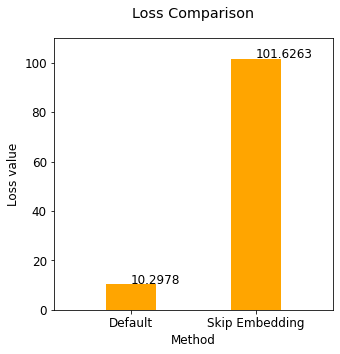

In [62]:
draw_comparison([min_loss_default, min_loss_skip_e], names2, metric="Loss", figsize=(5,5),label_off=0.3, ylim=[0, 110])

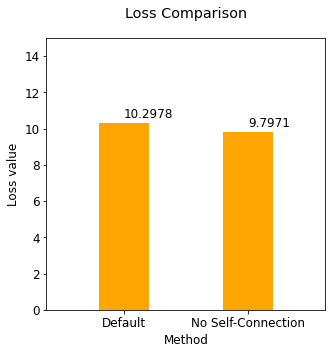

In [76]:
draw_comparison([min_loss_default, min_loss_nobi], names3, metric="Loss", figsize=(5,5),label_off=0.3, ylim=[0, 15])

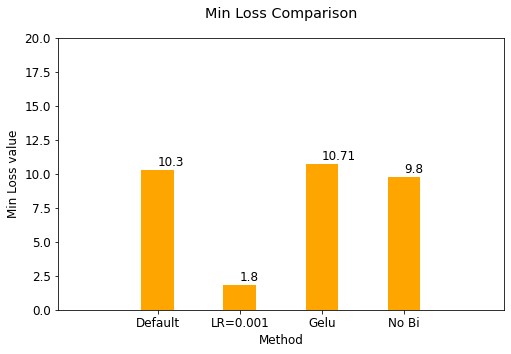

In [13]:
draw_comparison([min_loss_default, min_loss_lr0001, min_loss_gelu, min_loss_nobi], names1, metric="Min Loss", label_off=0.3, ylim=[0, 20])

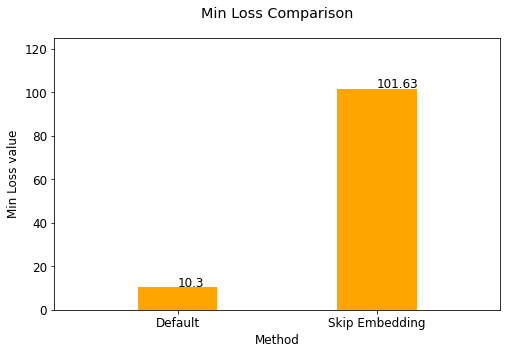

In [14]:
draw_comparison([min_loss_default, min_loss_skip_e], names2, metric="Min Loss", label_off=0.3, ylim=[0, 125])

## NDCG

In [72]:
max_ndcg_paper = 0.1327
max_ndcg_default = 0.1316
max_ndcg_lr0001 = 0.11752
max_ndcg_skip_e = 0.04531
max_ndcg_gelu = 0.12964
max_ndcg_nobi = 0.13223

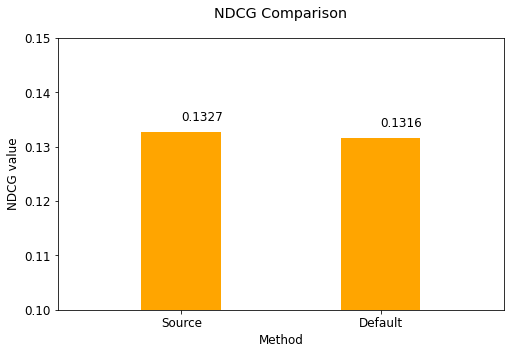

In [32]:
draw_comparison([max_ndcg_paper, max_ndcg_default], names0, metric="NDCG", label_off=0.002, ylim=[0.10, 0.15])

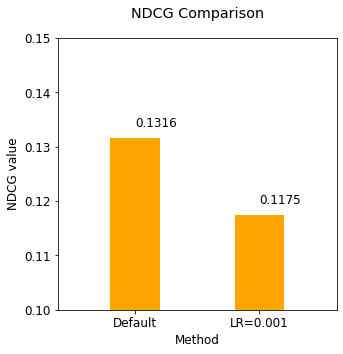

In [51]:
draw_comparison([max_ndcg_default, max_ndcg_lr0001], names4, metric="NDCG", label_off=0.002, figsize=(5,5),ylim=[0.10, 0.15])

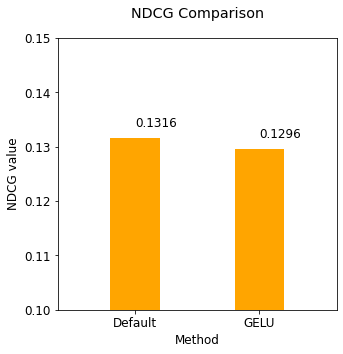

In [56]:
draw_comparison([max_ndcg_default, max_ndcg_gelu], names5, metric="NDCG", label_off=0.002, figsize=(5,5),ylim=[0.10, 0.15])

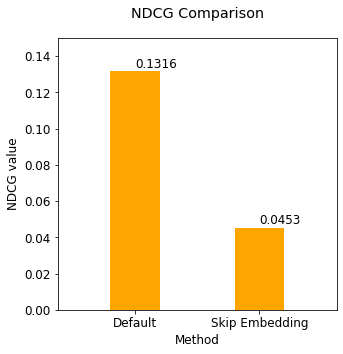

In [73]:
draw_comparison([max_ndcg_default, max_ndcg_skip_e], names2, metric="NDCG", label_off=0.002, figsize=(5,5),ylim=[0, 0.15])

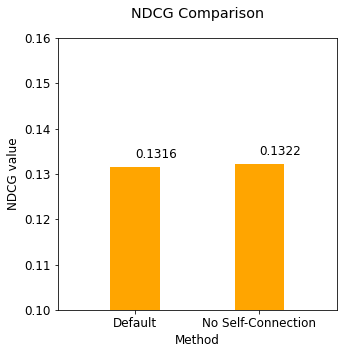

In [78]:
draw_comparison([max_ndcg_default, max_ndcg_nobi], names3, metric="NDCG", label_off=0.002, figsize=(5,5),ylim=[0.1, 0.16])

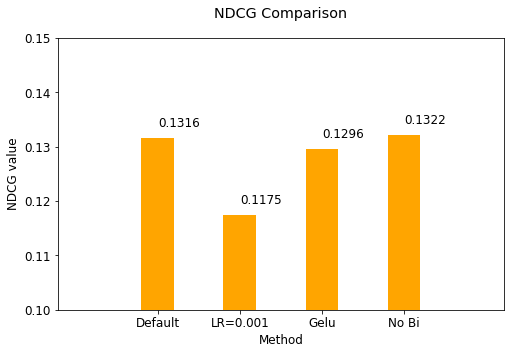

In [33]:
draw_comparison([max_ndcg_default, max_ndcg_lr0001,max_ndcg_gelu, max_ndcg_nobi], names1, metric="NDCG", label_off=0.002, ylim=[0.1, 0.15])

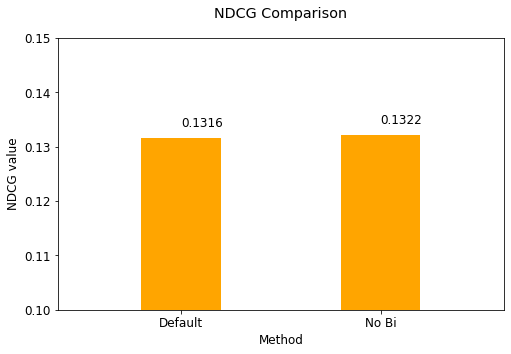

In [36]:
draw_comparison([max_ndcg_default, max_ndcg_nobi], names3, metric="NDCG", label_off=0.002, ylim=[0.1, 0.15])

## Recall

In [70]:
max_recall_paper = 0.1569
max_recall_default = 0.15483
max_recall_lr0001 = 0.14118
max_recall_skip_e = 0.06553
max_recall_gelu = 0.15336
max_recall_nobi = 0.15527

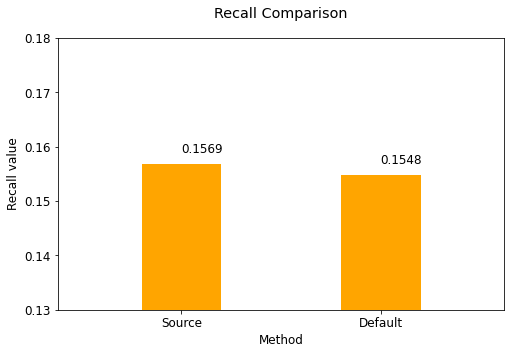

In [34]:
draw_comparison([max_recall_paper, max_recall_default], names0, metric="Recall", label_off=0.002, ylim=[0.13, 0.18])

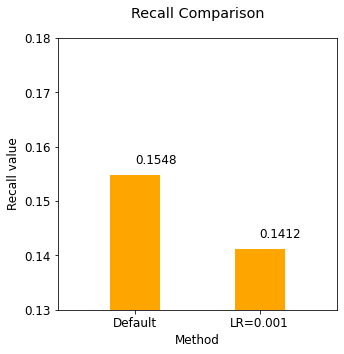

In [52]:
draw_comparison([max_recall_default, max_recall_lr0001], names4, metric="Recall", label_off=0.002, figsize=(5,5),ylim=[0.13, 0.18])

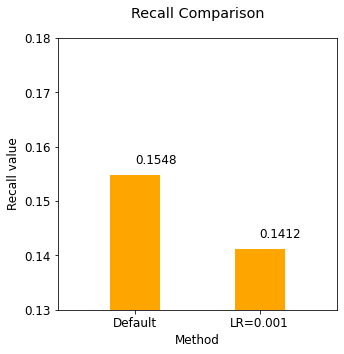

In [52]:
draw_comparison([max_recall_default, max_recall_lr0001], names4, metric="Recall", label_off=0.002, figsize=(5,5),ylim=[0.13, 0.18])

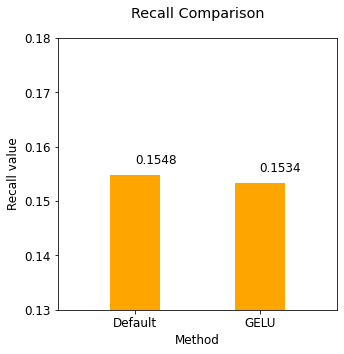

In [57]:
draw_comparison([max_recall_default, max_recall_gelu], names5, metric="Recall", label_off=0.002, figsize=(5,5),ylim=[0.13, 0.18])

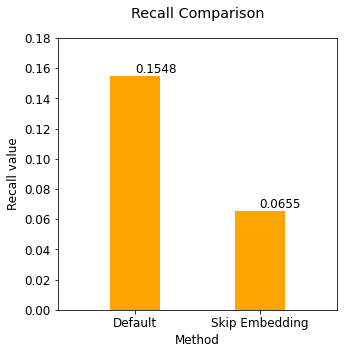

In [71]:
draw_comparison([max_recall_default, max_recall_skip_e], names2, metric="Recall", label_off=0.002, figsize=(5,5),ylim=[0, 0.18])

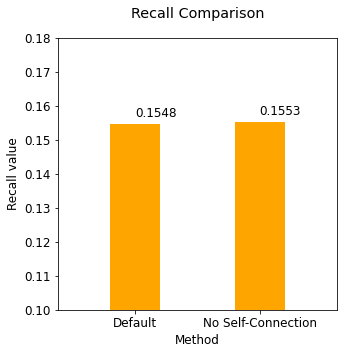

In [79]:
draw_comparison([max_recall_default, max_recall_nobi], names3, metric="Recall", label_off=0.002, figsize=(5,5),ylim=[0.1, 0.18])

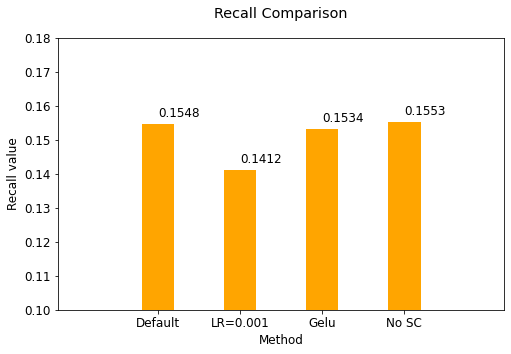

In [53]:
draw_comparison([max_recall_default, max_recall_lr0001, max_recall_gelu, max_recall_nobi], names1, metric="Recall", label_off=0.002, ylim=[0.1, 0.18])

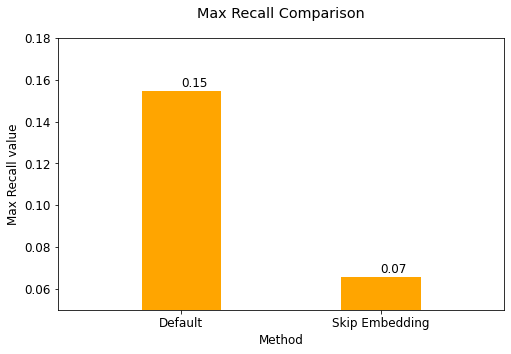

In [17]:
draw_comparison([max_recall_default, max_recall_skip_e], names2, metric="Recall", label_off=0.002, ylim=[0.05, 0.18])

In [80]:
default_time = 49425.7038
no_self_connection_time = 48812.18077

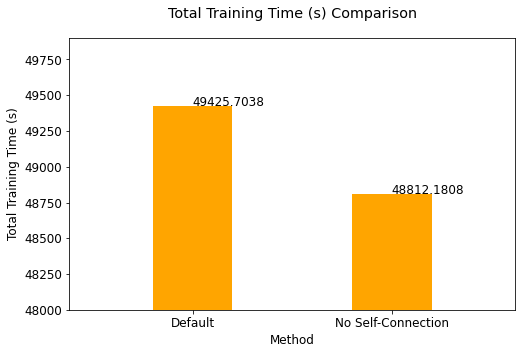

In [86]:
draw_comparison([default_time, no_self_connection_time], names3, metric="Total Training Time (s)", label_off=0.002, ylim=[48000, 49900])

In [93]:
default_params = 29858*64 + 40981*64 + 2*64*64*3 + 2*64*3
no_self_connection_time_params = 29858*64 + 40981*64 + 64*64*3 + 64*3

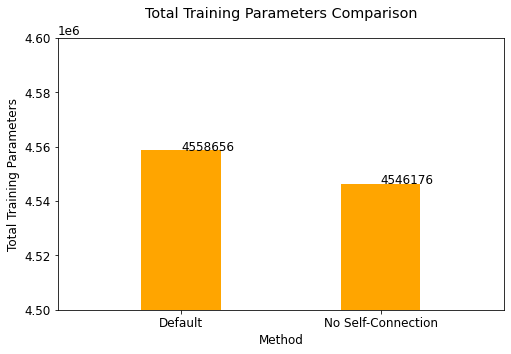

In [95]:
draw_comparison([default_params, no_self_connection_time_params], names3, metric="Total Training Parameters", label_off=0.002, ylim=[4500000, 4600000])

In [18]:
# def draw_recall_and_min_loss_comparison(recalls, min_losses, names):
#     X_axis = np.arange(len(names))
#     plt.rcParams.update({'font.size': 12})
#     plt.bar(X_axis - 0.2, recalls, 0.4, label = "Recall")
#     plt.bar(X_axis + 0.2, min_losses, 0.4, label = 'Min Loss')

#     plt.xticks(X_axis, names)
#     plt.xlabel("Experiments")
#     plt.ylabel("Number of Students")
#     plt.title(f"Comparison between {names[0]} and {names[1]}")
#     plt.legend()
#     plt.show()

In [19]:
# draw_recall_and_min_loss_comparison([max_recall_default, max_recall_lr0001], [min_loss_default, min_loss_lr0001], names)